In [1]:
import pandas as pd
import numpy as np
from utils.const import *
from utils.physics import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [3]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)


In [5]:
parent_MC = "/Volumes/Extreme SSD/data/MC/convPkl/inbending/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/data/MC/convPkl/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/data/MC/convPkl/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/data/exp/convPkl/inb/"

df_2942_corr = pd.read_pickle(parent_MC + "2942.pkl")
df_3284_1g_corr = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
df_3284_2g_corr = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
exp_1g_corr = pd.read_pickle(parent_exp + "dvcs_inb_corr.pkl")
exp_2g_corr = pd.read_pickle(parent_exp + "pi0_inb_corr.pkl")

In [6]:
parent_MC = "/Volumes/Extreme SSD/data/MC/convPkl_noCorr/inbending/"
parent_MC_bkg1g = "/Volumes/Extreme SSD/data/MC/convPkl_noCorr/bkg_1g/"
parent_MC_bkg2g = "/Volumes/Extreme SSD/data/MC/convPkl_noCorr/bkg_2g/"
parent_exp = "/Volumes/Extreme SSD/data/exp/convPkl_noCorr/inb/"


df_2942 = pd.read_pickle(parent_MC + "2942.pkl")
df_3284_1g = pd.read_pickle(parent_MC_bkg1g + "3284.pkl")
df_3284_2g = pd.read_pickle(parent_MC_bkg2g + "3284.pkl")
exp_1g = pd.read_pickle(parent_exp + "dvcs_inb_noCorr.pkl")
exp_2g = pd.read_pickle(parent_exp + "pi0_inb_noCorr.pkl")

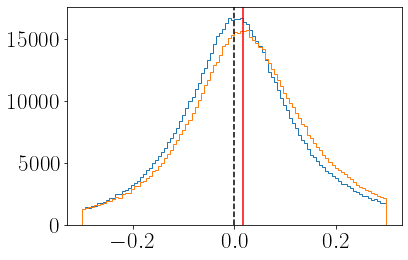

In [19]:
plt.hist(df_2942_corr.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.hist(df_2942.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.axvline(0.135**2, color = 'r')
plt.axvline(0, color = 'k', linestyle='--')
plt.show()

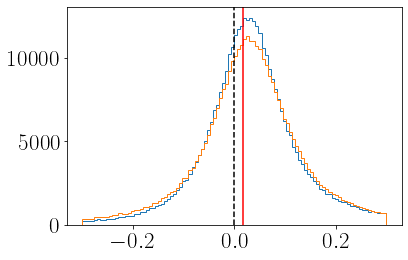

In [20]:
plt.hist(df_3284_1g_corr.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.hist(df_3284_1g.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.axvline(0.135**2, color = 'r')
plt.axvline(0, color = 'k', linestyle='--')
plt.show()

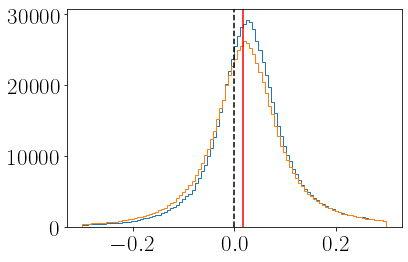

In [21]:
plt.hist(df_3284_2g_corr.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.hist(df_3284_2g.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.axvline(0.135**2, color = 'r')
plt.axvline(0, color = 'k', linestyle='--')
plt.show()

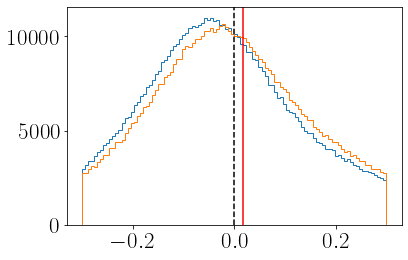

In [22]:
plt.hist(exp_1g_corr.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.hist(exp_1g.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.axvline(0.135**2, color = 'r')
plt.axvline(0, color = 'k', linestyle='--')
plt.show()

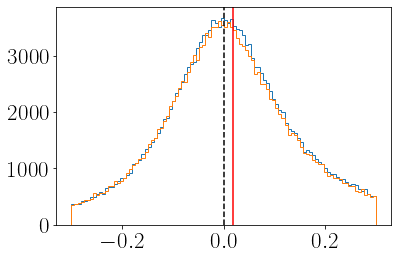

In [23]:
plt.hist(exp_2g_corr.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.hist(exp_2g.MM2_ep, bins = np.linspace(-0.3, 0.3, 101), histtype = 'step')
plt.axvline(0.135**2, color = 'r')
plt.axvline(0, color = 'k', linestyle='--')
plt.show()

In [10]:
print(len(df_2942_corr), len(df_3284_1g_corr), len(df_3284_2g_corr), len(exp_1g_corr), len(exp_2g_corr))

794250 389729 747804 789083 197982


In [58]:
bkgSimInbFD = df_2942_corr.loc[(df_2942_corr.Psector<7)&(df_2942_corr.Ptheta<35), :]
pi0SimInbFD = df_3284_2g_corr.loc[(df_3284_2g_corr.Psector<7)&(df_3284_2g_corr.Ptheta<35), :]
pi0ExpInbFD = exp_2g_corr.loc[(exp_2g_corr.Psector<7)&(exp_2g_corr.Ptheta<35), :]
epgExpInbFD = exp_1g_corr.loc[(exp_1g_corr.Psector<7)&(exp_1g_corr.Ptheta<35), :]
dvcsSimInbFD = df_2942_corr.loc[(df_2942_corr.Psector<7)&(df_2942_corr.Ptheta<35), :]
len_bkgSimInbFD = len(bkgSimInbFD)
len_pi0SimInbFD = len(pi0SimInbFD)
len_pi0ExpInbFD = len(pi0ExpInbFD)
len_epgExpInbFD = len(epgExpInbFD)
len_dvcsSimInbFD = len(dvcsSimInbFD)

In [59]:
def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [60]:
len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD

0.2543169124205628

In [74]:
print(len_bkgSimInbFD, len_pi0SimInbFD, len_pi0ExpInbFD, len_epgExpInbFD, len_dvcsSimInbFD)

66562 443395 112688 80224 66562


nu 5.46853566580244
xB 0.43005788552436863
W 2.566924755393494
t2 0.6976502716835925
Q2 4.430268445259672
phi2 173.4549542684141


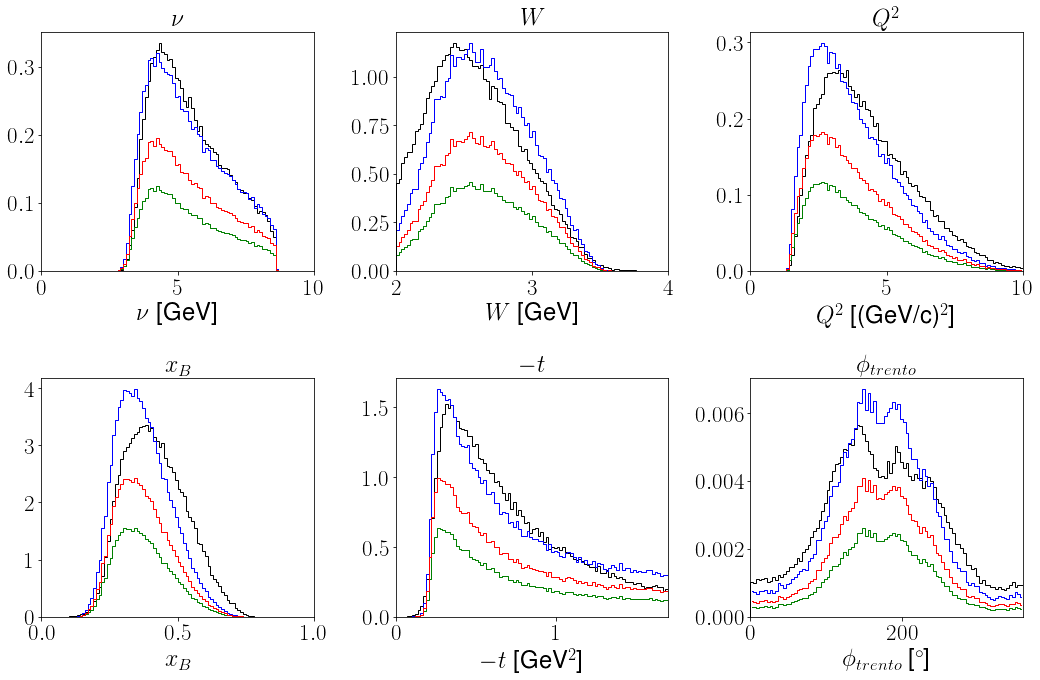

<Figure size 432x288 with 0 Axes>

In [70]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [2.5, 2, 1, 0.05, 0, 0]
binends = [6, 3, 5, 0.85, 1.7, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins)
        simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
        axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [1]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 21)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins)
        simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
        axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

NameError: name 'degree' is not defined

In [ ]:
onlydvcsIndvcsSim = dvcsMCInbCorrected["dvcs"] 
# onlydvcsIndvcsSim = onlydvcsIndvcsSim[onlydvcsIndvcsSim["t2"]<1.7]

varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [20, 0, 0, -0.5, -0.04, 0.1,-0.4 , 0]
binends = [60, 1.1, 10, 1.2, 0.04, 1.7, 0.4, 0.12]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
	for xind in range(0,4):
		ind = 4*yind + xind
		start = binstarts[ind]
		end = binends[ind]
		bins = np.linspace(start, end, 51)
		simDist_dvpi0, bins = np.histogram(onlydvcsIndvpi0Sim[varstoplot[ind]], bins, density = True)
		simDist_dvcs, bins = np.histogram(onlydvcsIndvcsSim[varstoplot[ind]], bins, density = True)
		simDist = cont_inb*simDist_dvpi0 + (1-cont_inb)*simDist_dvcs
		bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
		axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
		axs[yind, xind].step(bincenters, cont_inb*simDist_dvpi0, where='mid',color='g', linewidth=1)
		axs[yind, xind].step(bincenters, (1-cont_inb)*simDist_dvcs, where='mid',color='r', linewidth=1)
		axs[yind, xind].hist(onlydvcsIndata[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=4)
		axs[yind, xind].set_title(title[ind])
		axs[yind, xind].set_xlim([start, end])
		if (unit[ind]):
			axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
		else:
			axs[yind, xind].set_xlabel(title[ind])
plt.tight_layout()
plt.show()
# plt.savefig("simComparison_2.pdf")
plt.clf()

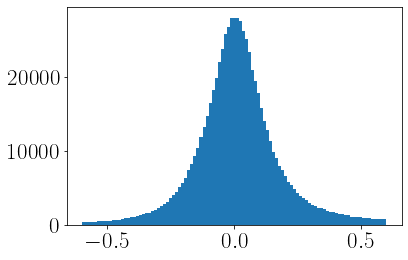

0.012625136405643037 0.16408414850066422


In [13]:
df_2942_corr_CD  = df_2942_corr.loc[df_2942_corr.Psector>7, ["Pp", "GenPp", "MM2_ep"]]
# plt.hist2d(df_2942_corr_CD.Pp, df_2942_corr_CD.GenPp - df_2942_corr_CD.Pp, bins = [np.linspace(0, 2, 101), np.linspace(-0.06, 0.06, 101)], cmap = cmap, cmin = 1)
plt.hist(df_2942_corr_CD.MM2_ep, bins = 101)
plt.show()
print(df_2942_corr_CD.MM2_ep.mean(), df_2942_corr_CD.MM2_ep.std())

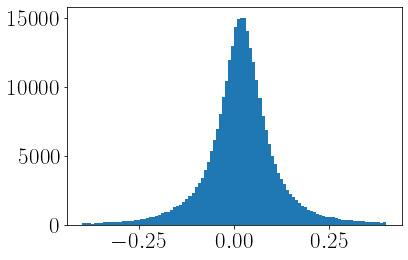

0.01663001219538002 0.1306335771869986


In [17]:
df_3284_2g_corr_CD  = df_3284_2g_corr.loc[df_3284_2g_corr.Psector>7, ["Pp", "GenPp", "MM2_ep"]]
# plt.hist2d(df_2942_corr_CD.Pp, df_2942_corr_CD.GenPp - df_2942_corr_CD.Pp, bins = [np.linspace(0, 2, 101), np.linspace(-0.06, 0.06, 101)], cmap = cmap, cmin = 1)
plt.hist(df_3284_2g_corr_CD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
plt.show()
print(df_3284_2g_corr_CD.MM2_ep.mean(), df_3284_2g_corr_CD.MM2_ep.std())

In [8]:
print(len(df_2942), len(df_3284_1g), len(df_3284_2g), len(exp_1g), len(exp_2g))

791224 388101 727805 785944 193018


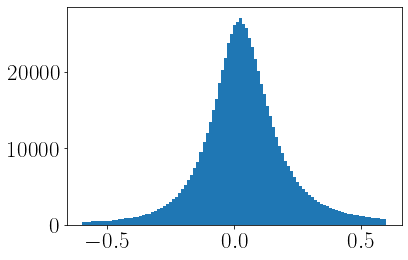

0.034500585030019564 0.16863642497128806


In [14]:
df_2942_CD  = df_2942.loc[df_2942.Psector>7, ["Pp", "GenPp", "MM2_ep"]]
# plt.hist2d(df_2942_CD.Pp, df_2942_CD.GenPp - df_2942_CD.Pp, bins = [np.linspace(0, 2, 101), np.linspace(-0.06, 0.06, 101)], cmap = cmap, cmin = 1)
plt.hist(df_2942_CD.MM2_ep, bins = 101)
plt.show()
print(df_2942_CD.MM2_ep.mean(), df_2942_CD.MM2_ep.std())

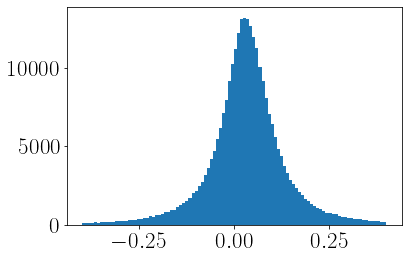

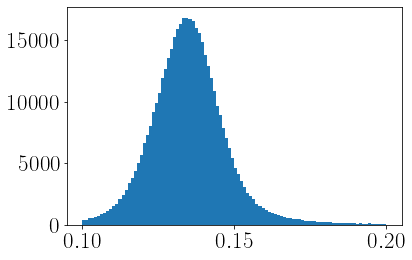

0.0302893251747372 0.1367613653708963
0.13519352329316467 0.013002318168587521


In [30]:
df_3284_2g_CD  = df_3284_2g.loc[df_3284_2g.Psector>7, ["Pp", "GenPp", "MM2_ep", "Mpi0"]]
df_3284_2g_FD  = df_3284_2g.loc[df_3284_2g.Psector<7, ["Pp", "GenPp", "MM2_ep", "Mpi0"]]
# plt.hist2d(df_2942_corr_CD.Pp, df_2942_corr_CD.GenPp - df_2942_corr_CD.Pp, bins = [np.linspace(0, 2, 101), np.linspace(-0.06, 0.06, 101)], cmap = cmap, cmin = 1)
plt.hist(df_3284_2g_CD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
plt.show()
plt.hist(df_3284_2g_FD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
plt.show()
print(df_3284_2g_CD.MM2_ep.mean(), df_3284_2g_CD.MM2_ep.std())
print(df_3284_2g_CD.Mpi0.mean(), df_3284_2g_CD.Mpi0.std())

In [12]:
print(0.135**2)

0.018225


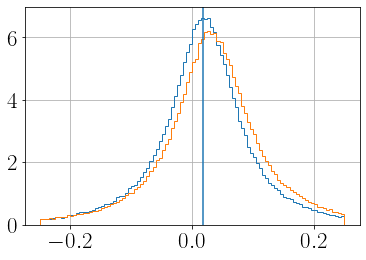

In [31]:
df_3284_2g_corr_CD.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), density = True, histtype = 'step')
df_3284_2g_CD.MM2_ep.hist(bins = np.linspace(-0.25, 0.25, 101), density = True, histtype = 'step')
plt.axvline(0.135**2)
plt.show()

In [71]:
bkgSimInbFD = df_2942.loc[(df_2942.Psector<7)&(df_2942.Ptheta<35), :]
pi0SimInbFD = df_3284_2g.loc[(df_3284_2g.Psector<7)&(df_3284_2g.Ptheta<35), :]
pi0ExpInbFD = exp_2g.loc[(exp_2g.Psector<7)&(exp_2g.Ptheta<35), :]
epgExpInbFD = exp_1g.loc[(exp_1g.Psector<7)&(exp_1g.Ptheta<35), :]
dvcsSimInbFD = df_2942.loc[(df_2942.Psector<7)&(df_2942.Ptheta<35), :]
len_bkgSimInbFD = len(bkgSimInbFD)
len_pi0SimInbFD = len(pi0SimInbFD)
len_pi0ExpInbFD = len(pi0ExpInbFD)
len_epgExpInbFD = len(epgExpInbFD)
len_dvcsSimInbFD = len(dvcsSimInbFD)

nu 5.474156882904685
xB 0.43006335741052826
W 2.568088795019574
t2 0.694688823062435
Q2 4.434262732359683
phi2 173.33012827000783


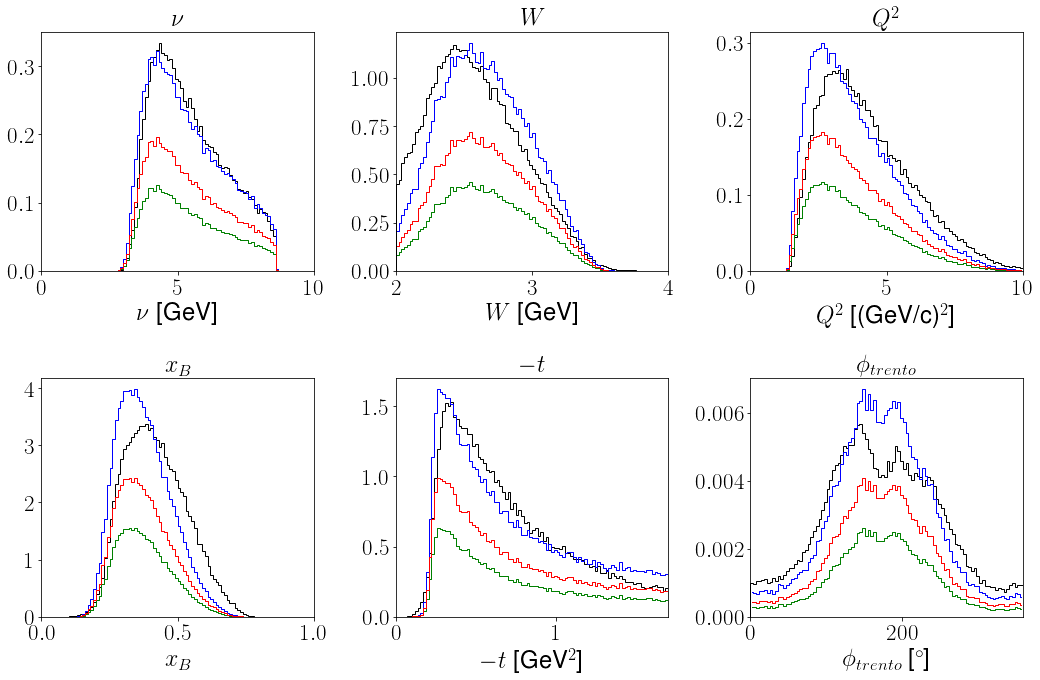

<Figure size 432x288 with 0 Axes>

In [72]:
varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$" ]
unit = [GeV, GeV, GeVc2, None, GeV2, degree, GeV2, degree]
binstarts = [0, 2, 0, 0, 0, 0]
binends = [10, 4, 10, 1, 1.7, 360]
fig, axs = plt.subplots(2, 3, figsize = (15, 10))
for xind in range(0,3):
    for yind in range(0, 2):
        ind =xind+3*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
#         simDist = len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0 + (len_epgExpInbFD/len_dvcsSimInbFD-len_bkgSimInbFD/len_pi0SimInbFD*len_pi0ExpInbFD/len_dvcsSimInbFD)*simDist_dvcs
        simDist = 0.39*simDist_dvpi0 + 0.61*simDist_dvcs
        expDist, bins = np.histogram(epgExpInbFD[varstoplot[ind]], bins, density=True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist, where='mid',color='b', linewidth=1)
        axs[yind, xind].step(bincenters, 0.39*simDist_dvpi0, where='mid',color='g', linewidth=1)
#         axs[yind, xind].step(bincenters, (1/len_dvcsSimInbFD-cont_inb_FD/len_dvcsSimInbFD)*len_epgExpInbFD*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', density=True, linewidth=1)
#         axs[yind, xind].hist(epgExpInbFD[varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='k', linewidth=1)
#         axs[yind, xind].step(bincenters, expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, where='mid',color='k', linewidth=1)
        print(varstoplot[ind], nphistmean(expDist - len_pi0ExpInbFD/len_pi0SimInbFD*simDist_dvpi0, bins))
        axs[yind, xind].step(bincenters, 0.61*simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [72]:
df_3284_2g_corr_FD = df_3284_2g_corr.loc[df_3284_2g_corr.Psector<7, :]
exp_2g_corr_FD = exp_2g_corr.loc[exp_2g_corr.Psector<7, :]
# df_3284_2g_corr_CD = df_3284_2g_corr.loc[(df_3284_2g_corr.Psector>7)&(df_3284_2g_corr.Gsector<7)&(df_3284_2g_corr.Gsector2<7), :]
exp_2g_corr_CD = exp_2g_corr.loc[(exp_2g_corr.Psector>7), :]
df_3284_2g_corr_CDFT = df_3284_2g_corr.loc[(df_3284_2g_corr.Etheta>5)&(df_3284_2g_corr.Psector>7)&(df_3284_2g_corr.Gsector>7)&(df_3284_2g_corr.Gsector2>7), :]
exp_2g_corr_CDFT = exp_2g_corr.loc[(exp_2g_corr.Etheta>5)&(exp_2g_corr.Psector>7)&(exp_2g_corr.Gsector>7)&(exp_2g_corr.Gsector2>7), :]
df_3284_2g_corr_CDFD = df_3284_2g_corr.loc[(df_3284_2g_corr.Etheta>5)&(df_3284_2g_corr.Psector>7)&(df_3284_2g_corr.Gsector<7)&(df_3284_2g_corr.Gsector2<7), :]
exp_2g_corr_CDFD = exp_2g_corr.loc[(exp_2g_corr.Etheta>5)&(exp_2g_corr.Psector>7)&(exp_2g_corr.Gsector<7)&(exp_2g_corr.Gsector2<7), :]

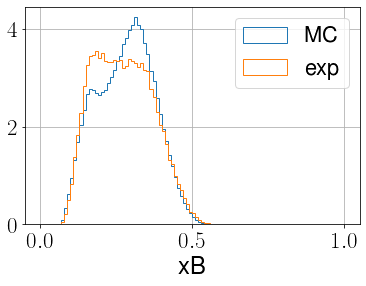

In [226]:
df_3284_2g_corr_CDFD.xB.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step', label = 'MC')
exp_2g_corr_CDFD.xB.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step', label = 'exp')
plt.legend(loc = 'upper right')
plt.xlabel("xB")
plt.show()

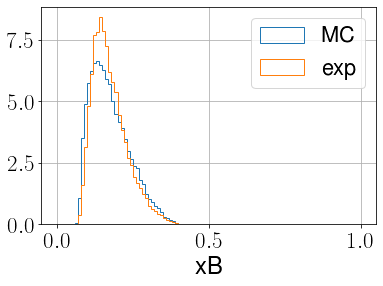

In [222]:
df_3284_2g_corr_CD.xB.hist(bins = np.linspace(0, 1, 101), density = True, histtype = 'step', label = 'MC')
exp_2g_corr_CD.xB.hist(bins = np.linspace(0,1 , 101), density = True, histtype = 'step', label = 'exp')
plt.legend(loc = 'upper right')
plt.xlabel("xB")
plt.show()

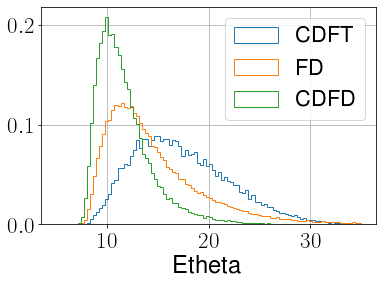

In [228]:
exp_2g_corr_CD.Etheta.hist(bins = np.linspace(5, 35, 101), density = True, histtype = 'step', label = 'CDFT')
exp_2g_corr_FD.Etheta.hist(bins = np.linspace(5, 35, 101), density = True, histtype = 'step', label = 'FD')
exp_2g_corr_CDFD.Etheta.hist(bins = np.linspace(5, 35, 101), density = True, histtype = 'step', label = 'CDFD')
plt.legend(loc = 'upper right')
plt.xlabel("Etheta")
plt.show()

<AxesSubplot:>

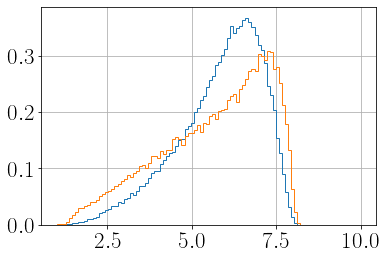

In [200]:
# df_3284_2g_corr_FD.Ee.hist(bins = np.linspace(1, 10, 101), density = True, histtype = 'step')
exp_2g_corr_FD.Ee.hist(bins = np.linspace(1, 10, 101), density = True, histtype = 'step')
exp_2g_corr_CD.Ee.hist(bins = np.linspace(1, 10, 101), density = True, histtype = 'step')

<AxesSubplot:>

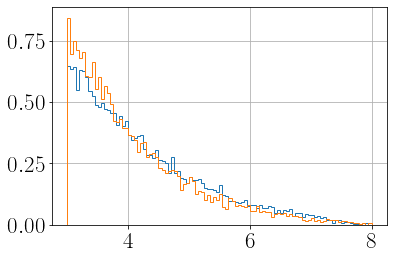

In [175]:
df_3284_2g_corr_CD.Ee.hist(bins = np.linspace(3, 8, 101), density = True, histtype = 'step')
exp_2g_corr_CD.Ee.hist(bins = np.linspace(3, 8, 101), density = True, histtype = 'step')

<AxesSubplot:>

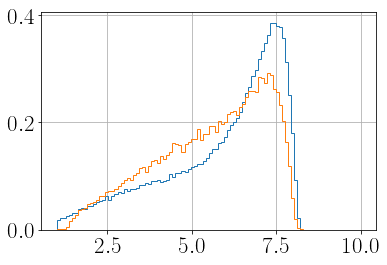

In [141]:
df_3284_2g_CD.Ee.hist(bins = np.linspace(1, 10, 101), density = True, histtype = 'step')
exp_2g_CD.Ee.hist(bins = np.linspace(1, 10, 101), density = True, histtype = 'step')

<AxesSubplot:>

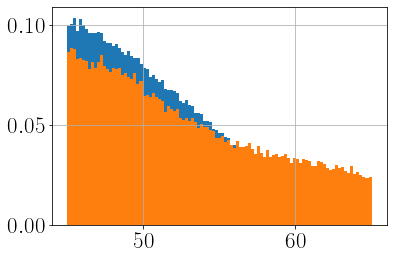

In [138]:
df_3284_2g_corr_CD.Ptheta.hist(bins = 101, density = True)
exp_2g_corr_CD.Ptheta.hist(bins = 101, density = True)

<AxesSubplot:>

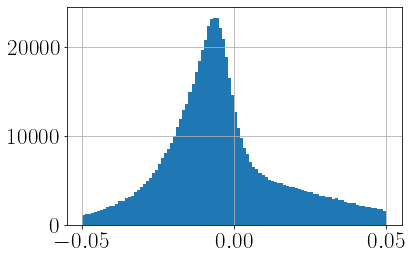

In [97]:
(df_3284_2g.Pp - df_3284_2g.GenPp).hist(bins = np.linspace(-0.05, 0.05, 101))

<AxesSubplot:>

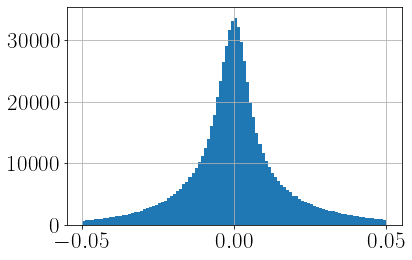

In [164]:
(df_3284_2g_corr.Pp - df_3284_2g_corr.GenPp).hist(bins = np.linspace(-0.05, 0.05, 101))

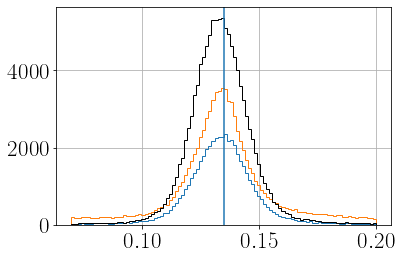

In [73]:
(exp_2g_corr_CDFD.Mpi0).hist(bins = np.linspace(0.07, 0.2, 101), histtype = 'step')
(exp_2g_corr_CD.Mpi0).hist(bins = np.linspace(0.07, 0.2, 101), histtype = 'step')
(exp_2g_corr_FD.Mpi0).hist(bins = np.linspace(0.07, 0.2, 101), histtype = 'step', color = 'k')
plt.axvline(0.135)
plt.show()

In [171]:
(exp_2g_corr_CD.Mpi0).mean()

0.13437558183050693

In [190]:
df_3284_2g_FD = df_3284_2g.loc[df_3284_2g.Psector<7, :]
exp_2g_FD = exp_2g.loc[exp_2g.Psector<7, :]
df_3284_2g_CD = df_3284_2g.loc[(df_3284_2g.Psector>7)&(df_3284_2g.Gsector>7)&(df_3284_2g.Gsector2>7) , :]
exp_2g_CD = exp_2g.loc[(exp_2g.Etheta>10)& (exp_2g.Psector>7)&(exp_2g.Gsector>7)&(exp_2g.Gsector2>7), :]

<AxesSubplot:>

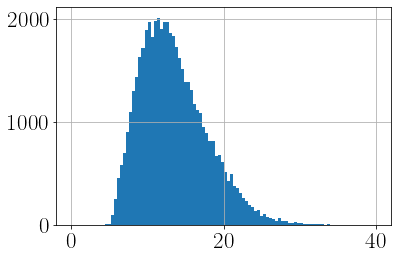

In [68]:
exp_2g_corr_CDFD.Gtheta2.hist(bins = np.linspace(0, 40, 101))

<AxesSubplot:>

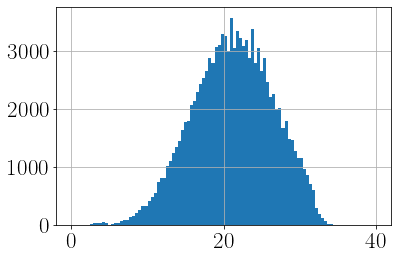

In [67]:
exp_2g_corr_FD.Gtheta.hist(bins = np.linspace(0, 40, 101))

In [111]:
exp_2g_corr_CDFDFT = exp_2g_corr.loc[(exp_2g_corr.Etheta>5)&(exp_2g_corr.Psector>7)&(exp_2g_corr.Gsector<7)&(exp_2g_corr.Gsector2>7), :]
exp_2g_corr_CDFTFD = exp_2g_corr.loc[(exp_2g_corr.Etheta>5)&(exp_2g_corr.Psector>7)&(exp_2g_corr.Gsector>7)&(exp_2g_corr.Gsector2<7), :]


In [58]:
exp_2g_corr_CD.Gtheta2.hist()

NameError: name 'exp_2g_corr_CD' is not defined

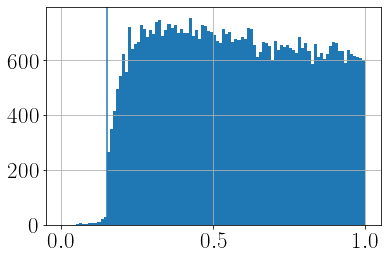

In [56]:
exp_2g_corr_FD.Ge2.hist(bins = np.linspace(0, 1, 101))
plt.axvline(0.15)

In [51]:
exp_2g_corr.Ge2.min()

0.04184878774469574

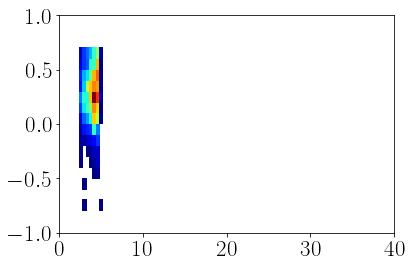

In [118]:
plt.hist2d(exp_2g_corr_CDFTFD.Gtheta, exp_2g_corr_CDFTFD.ME_epgg, bins = [np.linspace(0,40, 101), np.linspace(-1, 1, 21)], cmin = 1, cmap = cmap)
plt.show()

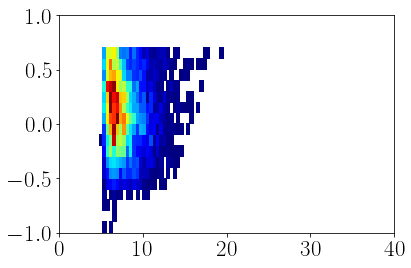

In [117]:
plt.hist2d(exp_2g_corr_CDFDFT.Gtheta, exp_2g_corr_CDFDFT.ME_epgg, bins = [np.linspace(0,40, 101), np.linspace(-1, 1, 21)], cmin = 1, cmap = cmap)
plt.show()

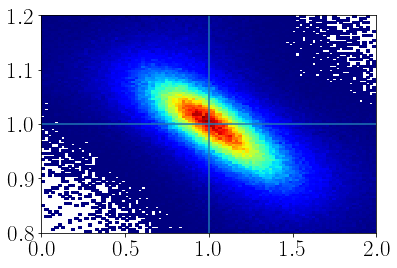

In [143]:
plt.hist2d(df_3284_2g_corr.MM2_egg/0.938**2, df_3284_2g_corr.Mpi0/0.135, bins = [np.linspace(0,2, 101), np.linspace(0.8, 1.2, 101)], cmin = 1, cmap = cmap)
plt.axhline(1)
plt.axvline(1)
plt.show()

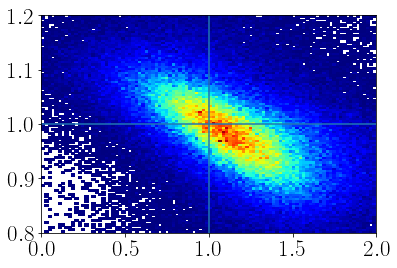

In [144]:
plt.hist2d(exp_2g_corr.MM2_egg/0.938**2, exp_2g_corr.Mpi0/0.135, bins = [np.linspace(0,2, 101), np.linspace(0.8, 1.2, 101)], cmin = 1, cmap = cmap)
plt.axhline(1)
plt.axvline(1)
plt.show()

<AxesSubplot:>

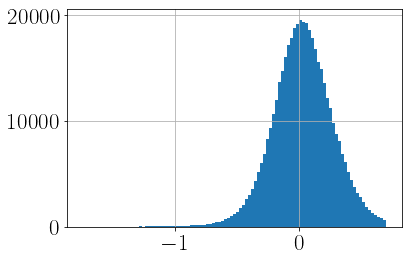

In [108]:
df_3284_2g_corr.loc[df_3284_2g_corr.Psector<7, "ME_epgg"].hist(bins = 101)

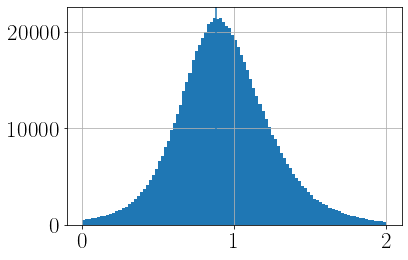

In [127]:
df_3284_2g_corr.MM2_egg.hist(bins = np.linspace(0, 2, 101))
plt.axvline(0.938**2)

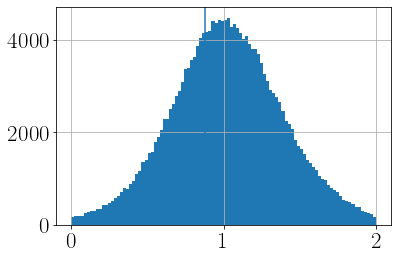

In [128]:
exp_2g_corr.MM2_egg.hist(bins = np.linspace(0, 2, 101))
plt.axvline(0.938**2)

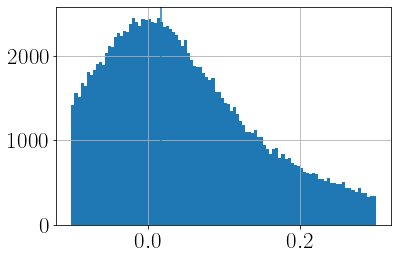

In [126]:
exp_2g_corr.MM2_ep.hist(bins = np.linspace(-0.1, 0.3, 101))
plt.axvline(0.135**2)

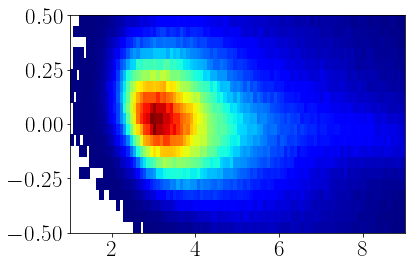

In [170]:
plt.hist2d((df_3284_2g_corr.Ge)+(df_3284_2g_corr.Ge2), (df_3284_2g_corr.ME_epgg), bins = [np.linspace(1,9, 101), np.linspace(-0.5, 0.5, 21)], cmin = 1, cmap = cmap)
# plt.axhline(1)
# plt.axvline(1)
plt.show()

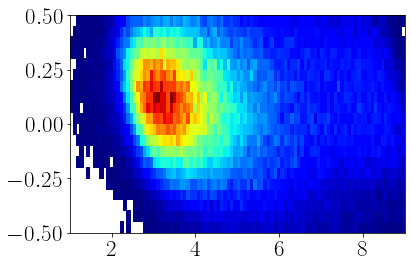

In [171]:
plt.hist2d(exp_2g_corr.Ge2+exp_2g_corr.Ge, exp_2g_corr.ME_epgg, bins = [np.linspace(1,9, 101), np.linspace(-0.5, 0.5, 21)], cmin = 1, cmap = cmap)
# plt.axhline(1)
# plt.axvline(1)
plt.show()

<AxesSubplot:>

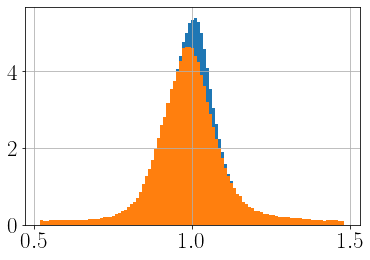

In [176]:
(df_3284_2g_corr.Mpi0/0.135).hist(bins = 101, density = True)
(exp_2g_corr.Mpi0/0.135).hist(bins = 101, density = True)